<a href="https://colab.research.google.com/github/naufaldi001/Data-Analyst-Career-Track/blob/main/Data_Quality_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descriptive Statistics

In [14]:
import pandas as pd
import numpy as np
import io
import pandas_profiling 
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

In [15]:
# Cetak tipe data di setiap kolom retail_raw
print(retail_raw.dtypes)

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


**Length**

Fungsi len menghitung jumlah pengamatan dalam suatu series/column. Fungsi len akan menghitung semua pengamatan, terlepas dari apakah ada null-value atau tidak (include missing value).

In [16]:
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:', length_product_id)

Length kolom city: 5000
Length kolom product_id: 5000


**Count**

Fungsi count menghitung jumlah pengamatan non-NA/non-null dalam suatu series/column. Di lain pihak, fungsi len akan hanya menghitung jumlah elemen dari kolom baik kolom bersangkutan memiliki atau tidak memiliki missing value (include missing value).

In [17]:
# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:', count_city)

# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:', count_product_id)

Count kolom count_city: 4984
Count kolom product_id: 4989


**Missing Value**

Dengan Length dan Count, sekarang dapat menghitung jumlah missing-value. Jumlah nilai yang hilang adalah perbedaan antara Length dan Count.

In [18]:
# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom city: 0.3%
Persentase missing value kolom product_id: 0.2%


**Maximum dan Minimum**

Fungsi max dan min digunakan untuk mengetahui elemen terbesar dan terkecil dari suatu kolom di dataframe.

**Mean, Median, Modus dan Standard Deviasi**

Fungsi mean, median, modus dan standard deviasi digunakan untuk mengetahui pemusatan data dan persebarannya.

In [19]:
  # Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242863


**Quantile Statistics**

Quantiles adalah titik potong yang membagi distribusi dalam ukuran yang sama. Jika akan membagi distribusi menjadi empat grup yang sama, kuantil yang dibuat dinamai quartile. Jika dibagi kedalam 10 sepuluh grup yang sama dinamakan percentile. Dalam kasus di bawah ini, ingin membagi distribusi menjadi empat grup atau quartile.

In [20]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


**Correlation**

Korelasi adalah cara yang tepat untuk menemukan hubungan antara variabel numerik. Koefisien korelasi berkisar antara -1 hingga 1. Korelasi 1 adalah korelasi positif total, korelasi -1 adalah korelasi negatif total dan korelasi 0 adalah korelasi non-linear.

In [21]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


## Data Cleansing

In [22]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


**Outliers**
Outliers merupakan data observasi yang muncul dengan nilai-nilai ekstrim. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya.

Pada umumnya, outliers dapat ditentukan dengan metric IQR (interquartile range).

Rumus dasar dari IQR: Q3 - Q1, dan data suatu observasi dapat dikatakan outliers jika memenuhi kedua syarat dibawah ini:

< Q1 - 1.5 * IQR dan > Q3 + 1.5 * IQR

 

In [23]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4699, 9)


**Deduplikasi Data**
Duplikasi data merupakan data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya. Tentunya ada data yang duplikat dalam dataset yang dimiliki. Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi, sehingga proses ini dikenal dengan deduplikasi.



In [24]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4699, 9)
Shape akhir:  (4692, 9)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Case Study DQlab

### Data Profiling

In [25]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import pandas_profiling

# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())


Lima data teratas:
   InvoiceNo                          Description  ...  CustomerID      City
0     536365   WHITE HANGING HEART T-LIGHT HOLDER  ...       17850  Surabaya
1     536366                  WHITE METAL LANTERN  ...       17850  Surabaya
2     536367       CREAM CUPID HEARTS COAT HANGER  ...       17850  Surabaya
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE  ...       17850   Jakarta
4     536369       RED WOOLLY HOTTIE WHITE HEART.  ...       17850     Medan

[5 rows x 7 columns]

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


### Data Cleansing

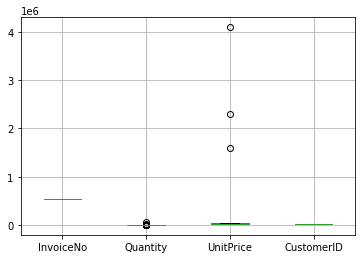

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool


In [26]:
#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()